# Transformacion datos escalada_0

In [43]:
import numpy as np
import pandas as pd
import matplotlib as plt 
from prettytable import PrettyTable
import math
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [2]:
def open_data(filename, d=''):
    data = []
    with open (filename, "r") as input:
        for line in input:
            data.append(line)
    return data

data_from_log = open_data('test_1sola_subida.log')

In [3]:
len(data_from_log)

452613

In [4]:
def filter_row_by_string(data_sample, filter_condition):
    filtered_rows = []
    for item in data_from_log[471:]:
        #print item
        data_sample = item.split(',')
        if item[0:4] == filter_condition:
            filtered_rows.append(data_sample)            
    return filtered_rows

In [5]:
IMUdata = filter_row_by_string(data_from_log, 'IMU,')

In [7]:
BAROdata = filter_row_by_string(data_from_log, 'BARO')

In [8]:
MAGdata = filter_row_by_string(data_from_log, 'MAG,')

In [9]:
print len(IMUdata),len(BAROdata),len(MAGdata)

100230 20048 20048


# Clasification IMUdata

In [10]:
############################################################################################
##########################      Clasification IMUdata    ###################################
############################################################################################

##########-----TIEMPO-----###################
T=[] #Lista para el tiempo de colecta de datos
for line in IMUdata:
    line=line[1:]
    Tiempo=float(line[0])/1000 #pasamos de milisegundos a segundos
    T.append(Tiempo)

TN = [] # Ponemos el contador de tiempo a 0 para cada mision.
tiempo=np.array(T)
for i in tiempo:
    TO=(i-tiempo.min()) 
    TN.append(TO) # metemos los segundos en la lista para poder operar con ellos

########--------ACELERACION-----#############
accX = [] 
accY = [] 
accZ = [] 

for line in IMUdata:
    line=line[1:]
    accx=float(line[4])
    accy=float(line[5])
    accz=float(line[6])
    accX.append(accx)
    accY.append(accy)
    accZ.append(accz)
    
########--------Gyroscopo-----#############
gyrX_rate=[] #velocidad angular: grados por segundo
gyrY_rate=[] 
gyrZ_rate=[]

for line in IMUdata:
    line=line[1:]
    gyrX=float(line[1])
    gyrY=float(line[2])
    gyrZ=float(line[3])
    gyrX_rate.append(gyrX)
    gyrY_rate.append(gyrY)
    gyrZ_rate.append(gyrZ)
    

########--------Magnetometro-----#############
MagX=[]
MagY=[] 
MagZ=[]

for line in MAGdata:
    line=line[1:]
    magX=float(line[1])
    magY=float(line[2])
    magZ=float(line[3])
    MagX.append(magX)
    MagY.append(magY)
    MagZ.append(magZ)

In [11]:
len(accX),len(accY),len(accZ),

(100230, 100230, 100230)

In [12]:
len(gyrX_rate),len(gyrY_rate),len(gyrZ_rate)

(100230, 100230, 100230)

In [13]:
len(MagX),len(MagY),len(MagZ)

(20048, 20048, 20048)

In [19]:
len(TN)

100230

In [18]:
TN[-1]/60   # El ultimo dato colectado TN[-1] se tomo en el segundo X, esto lo pasamos a min. En total experimento
            # duro 34.1 min.

34.096083333333333

# Construimos el DF

In [20]:
imu_data = pd.DataFrame({'Tiempo':TN, 'gyrX':gyrX_rate,'gyrY':gyrY_rate,'gyrZ':gyrZ_rate,
                        'accX':accX, 'accY':accY, 'accZ':accZ }) 

In [21]:
len(imu_data)

100230

In [22]:
imu_data

,Tiempo,accX,accY,accZ,gyrX,gyrY,gyrZ
0,0.000,9.901814,-1.469148,1.900490,0.186812,-0.015715,-0.069312
1,0.021,9.793001,-1.174665,1.860182,0.108262,-0.027487,-0.047148
2,0.040,9.619089,-0.495856,1.561478,0.092594,-0.049769,-0.042072
3,0.060,9.578066,-0.196705,1.304816,0.130263,-0.050577,-0.060528
4,0.080,9.784949,-0.622324,1.331428,0.131995,-0.033894,-0.090742
5,0.101,9.878273,-1.192269,1.538299,0.056301,-0.042668,-0.120941
6,0.120,9.883092,-1.228734,1.420189,-0.061219,-0.053586,-0.125327
7,0.140,9.745823,-0.702705,1.047378,-0.100193,-0.079489,-0.115646
8,0.160,9.559008,-0.290503,0.957136,-0.091180,-0.085519,-0.107597
9,0.180,9.624406,-0.206470,1.142921,-0.022787,-0.084887,-0.108680


In [49]:
imu_data.to_csv('Climb0_acc_gyr.csv', sep=',')

In [50]:
len(imu_data)

100230

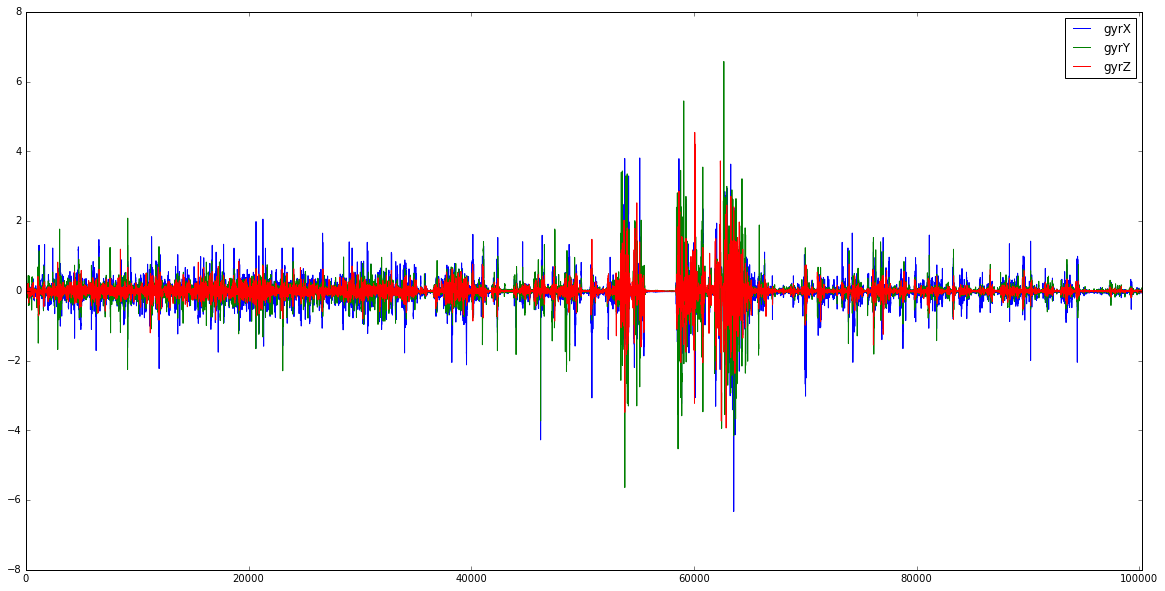

In [47]:
imu_data[['gyrX','gyrY','gyrZ']].plot(figsize=(20,10))

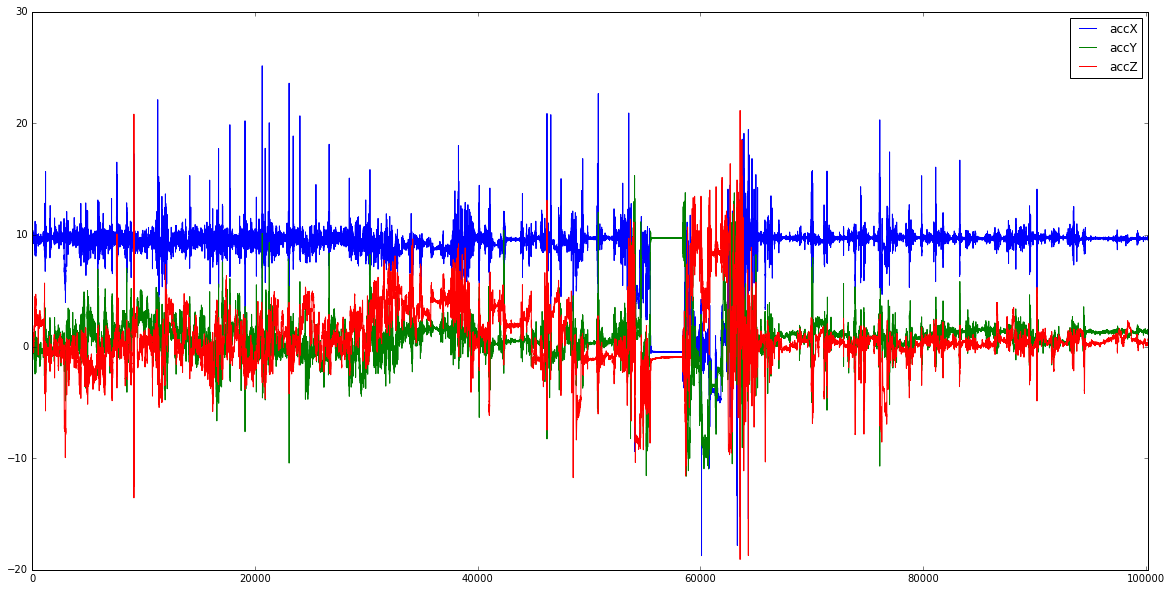

In [48]:
imu_data[['accX','accY','accZ']].plot(figsize=(20,10))

# Altura (BAROdata)

In [35]:

baroTime=[]
altura=[]

for line in BAROdata:
    line=line[1:]
    bartime=int(line[0])
    if len(baroTime) == 0:
        baroTime.append(0)
    else:
        baroTime.append(bartime - 40967)
    alt=float(line[1])
    altura.append(alt)

In [39]:
baroTime[-1]

2045547

In [36]:
baroTime[0:10]

[0, 0, 100, 200, 301, 399, 500, 600, 700, 800]

# DF magnetometro y barometro

In [40]:
Mag_baro_data = pd.DataFrame({'Tiempo':baroTime,'Altura':altura,'MagX':MagX,'MagY':MagY,'MagZ':MagZ})

In [41]:
Mag_baro_data.to_csv('Climb0_mag_bar.csv', sep=',')

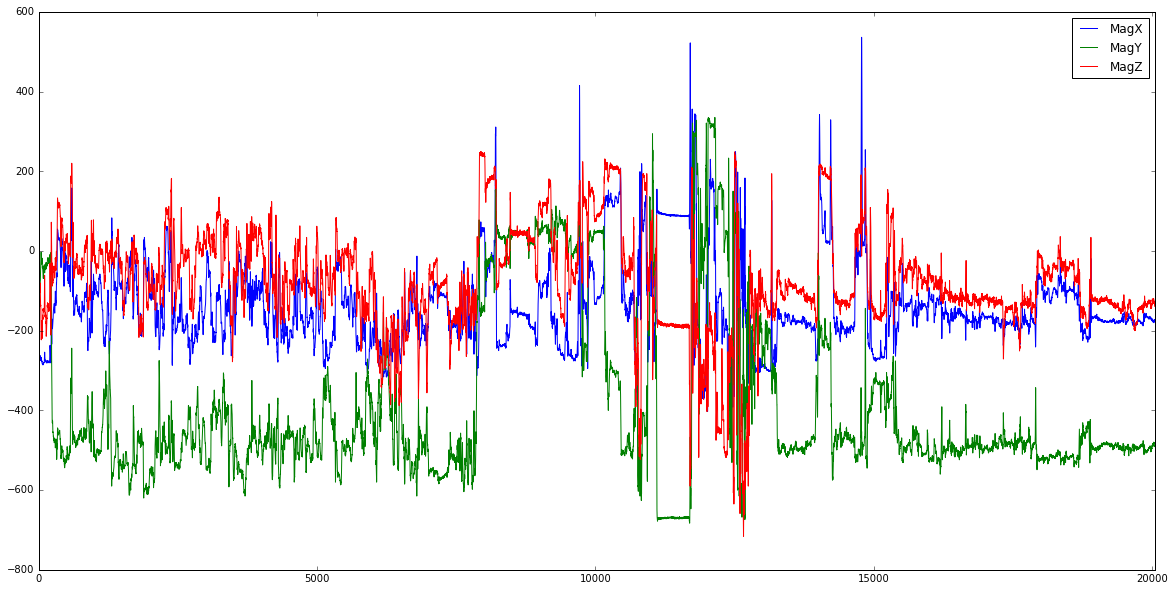

In [45]:
Mag_baro_data[['MagX','MagY','MagZ']].plot(figsize=(20,10))

In [51]:
len(Mag_baro_data)

20048

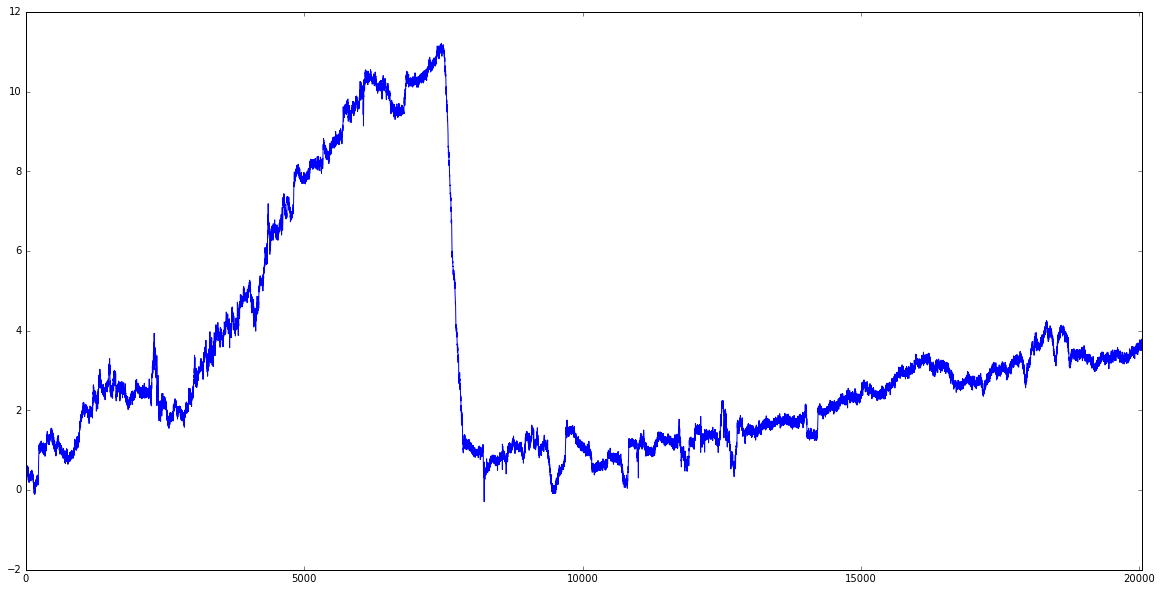

In [53]:
Mag_baro_data['Altura'].plot(figsize=(20,10))